In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pycoingecko
import datetime

# Download Data

## 1. Download Bitcoin Data

In [2]:
# Initialize CoinGecko API client
coinGecko = pycoingecko.CoinGeckoAPI()
# Get historical price data for Bitcoin
btc_data = coinGecko.get_coin_market_chart_by_id('bitcoin', 'usd', '365days')
btc_data

{'prices': [[1693094400000, 26002.015717319366],
  [1693180800000, 26082.717178218525],
  [1693267200000, 26109.2698239287],
  [1693353600000, 27730.50373550554],
  [1693440000000, 27297.261438480404],
  [1693526400000, 25927.417005779287],
  [1693612800000, 25812.33049442542],
  [1693699200000, 25853.65684277757],
  [1693785600000, 25959.596311463454],
  [1693872000000, 25829.364772941324],
  [1693958400000, 25784.41351983038],
  [1694044800000, 25752.958418589413],
  [1694131200000, 26192.333433090567],
  [1694217600000, 25907.228137249735],
  [1694304000000, 25889.3250094629],
  [1694390400000, 25834.580098562914],
  [1694476800000, 25133.303106566527],
  [1694563200000, 25866.806663158084],
  [1694649600000, 26223.436075660946],
  [1694736000000, 26531.39556626326],
  [1694822400000, 26634.631025000588],
  [1694908800000, 26557.768691994646],
  [1694995200000, 26520.988254783886],
  [1695081600000, 26741.461110948952],
  [1695168000000, 27219.296874634216],
  [1695254400000, 27115.

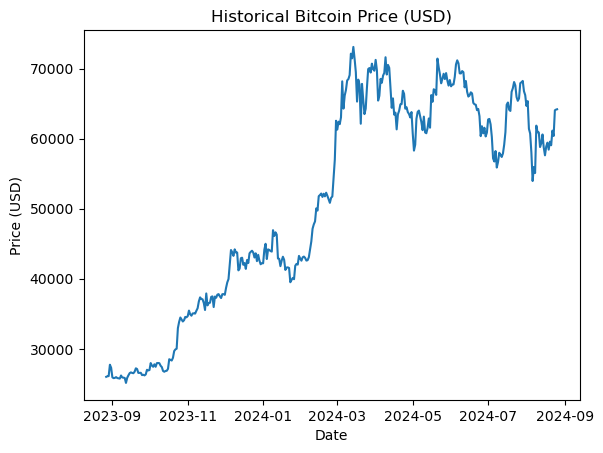

In [3]:


# Initialize CoinGecko API client
coinGecko = pycoingecko.CoinGeckoAPI()
# Get historical price data for Bitcoin
btc_data = coinGecko.get_coin_market_chart_by_id('bitcoin', 'usd', '365days')
# Extract the dates and prices from the data
dates = [data[0] for data in btc_data['prices']]
# convert unix timestamp to datetime
dates = [
    datetime.datetime.fromtimestamp(date/1000)
    for date in dates
]
prices = [data[1] for data in btc_data['prices']]
# Plot the data
plt.plot(dates, prices)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical Bitcoin Price (USD)')
plt.show()

In [4]:
dates

[datetime.datetime(2023, 8, 27, 2, 0),
 datetime.datetime(2023, 8, 28, 2, 0),
 datetime.datetime(2023, 8, 29, 2, 0),
 datetime.datetime(2023, 8, 30, 2, 0),
 datetime.datetime(2023, 8, 31, 2, 0),
 datetime.datetime(2023, 9, 1, 2, 0),
 datetime.datetime(2023, 9, 2, 2, 0),
 datetime.datetime(2023, 9, 3, 2, 0),
 datetime.datetime(2023, 9, 4, 2, 0),
 datetime.datetime(2023, 9, 5, 2, 0),
 datetime.datetime(2023, 9, 6, 2, 0),
 datetime.datetime(2023, 9, 7, 2, 0),
 datetime.datetime(2023, 9, 8, 2, 0),
 datetime.datetime(2023, 9, 9, 2, 0),
 datetime.datetime(2023, 9, 10, 2, 0),
 datetime.datetime(2023, 9, 11, 2, 0),
 datetime.datetime(2023, 9, 12, 2, 0),
 datetime.datetime(2023, 9, 13, 2, 0),
 datetime.datetime(2023, 9, 14, 2, 0),
 datetime.datetime(2023, 9, 15, 2, 0),
 datetime.datetime(2023, 9, 16, 2, 0),
 datetime.datetime(2023, 9, 17, 2, 0),
 datetime.datetime(2023, 9, 18, 2, 0),
 datetime.datetime(2023, 9, 19, 2, 0),
 datetime.datetime(2023, 9, 20, 2, 0),
 datetime.datetime(2023, 9, 21, 2,

### 2. Process JSON Data

#### 2.1. Convert JSON to CSV

In [59]:
# Process Gold JSON File
# input_file_path = "data/gold_prices.json"
# output_path = "data/Gold-USD-5-Years.csv"

In [60]:
# Process S&P_500 JSON File
input_file_path = "data/S_and_P_500-5-Years.json"
output_path = "data/S_and_P_500-5-Years.csv"

In [53]:
def read_file(file_path):
    with open(file_path, "r") as file:
      return json.loads(file.read())

In [54]:
def save_file(data, path):
    """
    Save the data locally
    """
    json_data.to_csv(path, sep=',', encoding='utf-8', index=False, header=True)

In [55]:
def timestamp_to_date(timestamp):
    return datetime.datetime.fromtimestamp(timestamp).date()

In [56]:
def process_json(file_path):
    """
     Load a json file and process it to a dataframe
    """
    # Load the JSON file
    json_data = read_file(file_path)
    
    # Create dataframe with 'open', close', high', low', volume' and 'timestamp'  values
    json_data_quote = pd.json_normalize(json_data, record_path=["chart", "result", "indicators", "quote"], 
                                  meta=[
                                      ["chart", "result"[0], "timestamp"]
                                  ])
    
    json_data_quote_exploded = json_data_quote.explode(["close", "open", "high", "low", "volume", "chart.r.timestamp"])
    
    # Create dataframe with 'adjclose'  and 'timestamp' values
    json_data_adjclose = pd.json_normalize(json_data, record_path=["chart", "result", "indicators", "adjclose"], 
                                  meta=[
                                      ["chart", "result"[0], "timestamp"]
                                  ])

    json_data_adjclose_exploded = json_data_adjclose.explode(["chart.r.timestamp", "adjclose"])
    
    # Merge the two dataframes on the 'timestamp' after exploding of the columns
    json_data_merged = json_data_quote_exploded.merge(json_data_adjclose_exploded, on = "chart.r.timestamp")
    
    # Rename the columns
    json_data_merged.rename(
        columns={"close": "Close", "open": "Open", "high": "High", "low": "Low", "volume": "Volume", "chart.r.timestamp": "Date", "adjclose": "Adj Close"},
                                         inplace = True)
    
    # Reorder columns
    json_data_merged = json_data_merged[
        ["Date", "Open",  "High", "Low", "Close", "Adj Close", "Volume"]
    ]
    
    # Convert timestamp to date
    json_data_merged.Date = json_data_merged.Date.apply(timestamp_to_date)

    return json_data_merged


In [57]:
json_data = process_json(input_file_path)
json_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-26,2866.699951,2879.27002,2856.0,2878.379883,2878.379883,2859790000
1,2019-08-27,2893.139893,2898.790039,2860.590088,2869.159912,2869.159912,3537490000
2,2019-08-28,2861.280029,2890.030029,2853.050049,2887.939941,2887.939941,3102480000
3,2019-08-29,2910.370117,2930.5,2905.669922,2924.580078,2924.580078,3177150000
4,2019-08-30,2937.090088,2940.429932,2913.320068,2926.459961,2926.459961,3009910000
...,...,...,...,...,...,...,...
1253,2024-08-19,5557.22998,5608.299805,5550.740234,5608.25,5608.25,3222050000
1254,2024-08-20,5602.879883,5620.509766,5585.5,5597.120117,5597.120117,2994420000
1255,2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000
1256,2024-08-22,5637.77002,5643.220215,5560.950195,5570.640137,5570.640137,2981530000


In [63]:
# Save the created Dataframe as CSV file
# save_file(json_data, output_path)

#### Plot the data

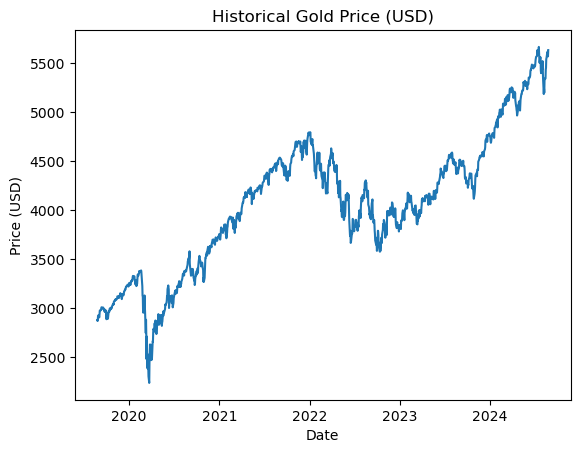

In [65]:
# Initialize CoinGecko API client
coinGecko = pycoingecko.CoinGeckoAPI()
# Get historical price data for Bitcoin
#btc_data = coinGecko.get_coin_market_chart_by_id('bitcoin', 'usd', '365days')
# Extract the dates and prices from the data
dates = json_data.Date
# convert unix timestamp to datetime
# dates = [
#     datetime.datetime.fromtimestamp(date/1000)
#     for date in dates
# ]
prices = json_data.Close
# Plot the data
plt.plot(dates, prices)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical Gold Price (USD)')
plt.show()

In [21]:
# gold_data_merged_after_explode.to_csv("data/Gold-USD-5-Years.csv", sep=',', encoding='utf-8', index=False, header=True)